# MNIST - Numbers Identification

## Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

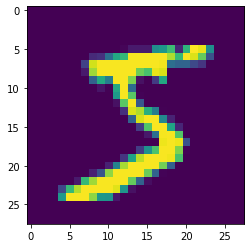

In [5]:
image=x_train[0]
plt.imshow(image)

## Data Preprocessing

### Converting Target Variable

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### Scaling and Reshaping Data

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

## Model Creation and Training

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (4, 4), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (4, 4), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 32, kernel_size = (4, 4), activation = 'relu'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1648 - accuracy: 0.9485 - val_loss: 0.0536 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0376 - accuracy: 0.9888 - val_loss: 0.0328 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0331 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0245 - accuracy: 0.9927 - val_loss: 0.0375 - val_accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0365 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0337 -

In [13]:
metrics = pd.DataFrame(model.history.history)

In [14]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.164767,0.948533,0.053567,0.9819
1,0.052120,0.984217,0.046271,0.9860
2,0.037613,0.988783,0.032770,0.9899
3,0.031045,0.990633,0.033132,0.9899
4,0.024517,0.992683,0.037481,0.9884
5,0.019573,0.994250,0.036452,0.9901
6,0.018244,0.994600,0.033674,0.9911
7,0.014466,0.995367,0.032512,0.9919
8,0.013957,0.995883,0.039372,0.9889
9,0.012347,0.996183,0.035966,0.9917


## Visualising Model Performance

<AxesSubplot:>

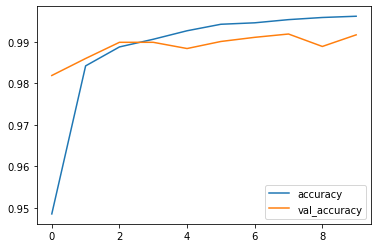

In [15]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

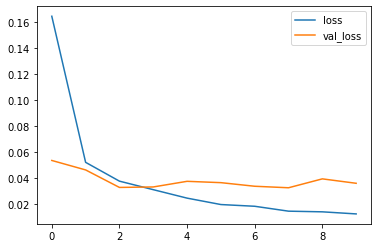

In [16]:
metrics[['loss','val_loss']].plot()

## Final Model

In [17]:
model.save("MNIST.h5")

## Thank You